<a href="https://colab.research.google.com/github/ronaldosilvak/machine_learning/blob/main/NaiveBayes_base_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import pandas as pd
import numpy as np

# **Base crédito**

# Análise exploratória

In [158]:
# default
# 0 -> indica que o empréstimo foi pago
# 1 -> indica que o empréstimo NÃO foi pago
# loan -> dívida
base_credit = pd.read_csv('/content/credit_data.csv')
base_credit.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [159]:
base_credit.tail()

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [160]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [161]:
base_credit[base_credit['income']>69995]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [162]:
base_credit[base_credit['loan'] <= 1.377630]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


# Visualização de dados

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [164]:
sns.set_style("whitegrid")

In [165]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

<Axes: xlabel='default', ylabel='count'>

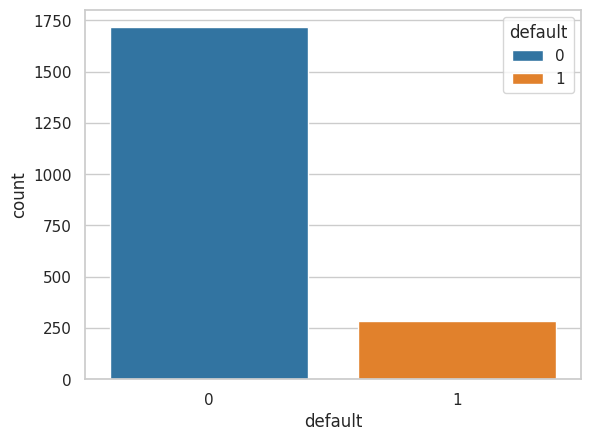

In [166]:
sns.countplot(x=base_credit['default'], hue=base_credit['default'])

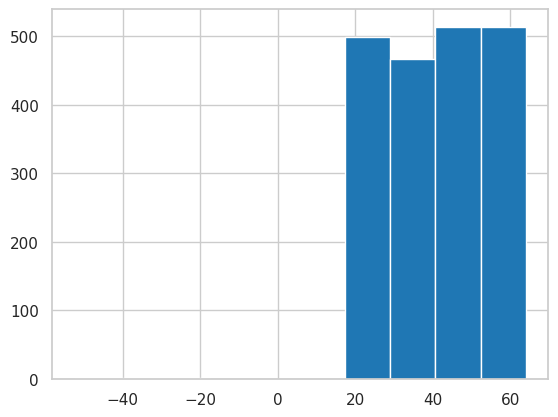

In [167]:
plt.hist(x=base_credit['age']);

(array([189., 198., 199., 179., 204., 209., 206., 199., 219., 198.]),
 array([20014.48947005, 25012.60908088, 30010.7286917 , 35008.84830253,
        40006.96791336, 45005.08752419, 50003.20713501, 55001.32674584,
        59999.44635667, 64997.5659675 , 69995.68557832]),
 <BarContainer object of 10 artists>)

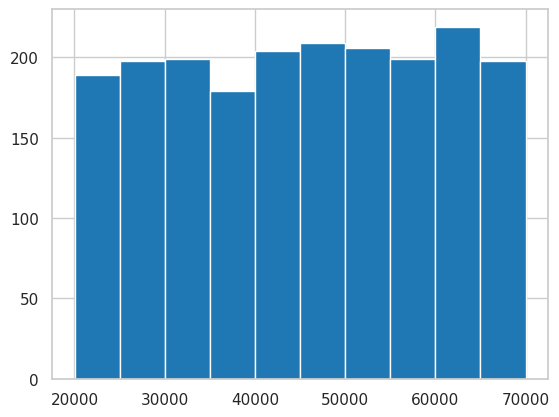

In [168]:
plt.hist(x=base_credit['income'])

(array([345., 373., 318., 277., 266., 171., 104.,  89.,  40.,  17.]),
 array([1.37762959e+00, 1.37784499e+03, 2.75431235e+03, 4.13077971e+03,
        5.50724707e+03, 6.88371443e+03, 8.26018180e+03, 9.63664916e+03,
        1.10131165e+04, 1.23895839e+04, 1.37660512e+04]),
 <BarContainer object of 10 artists>)

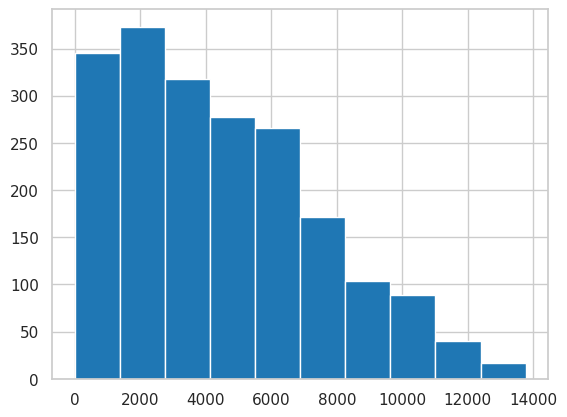

In [169]:
plt.hist(x=base_credit['loan'])

In [170]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='default')
grafico.show()

# Tratamento de valores inconsistentes

In [171]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [172]:
base_credit.loc[base_credit['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [173]:
# Apagar a coluna inteira (de todos os registros da base de dados)
# essencial caso a coluna "age" estivesse com os dados muito divergentes com o âmbito real
base_credit2 = base_credit.drop('age', axis=1)
base_credit2.head()

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1


In [174]:
base_credit.index

RangeIndex(start=0, stop=2000, step=1)

In [175]:
base_credit[base_credit['age']<0].index

Int64Index([15, 21, 26], dtype='int64')

In [176]:
# Apagar somente os registros com valores inconsistentes
base_credit3 = base_credit.drop(base_credit[base_credit['age']<0].index)
base_credit3

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [177]:
base_credit3.loc[base_credit3['age']<0]

,clientid,income,age,loan,default


In [178]:
# Prencher os valores faltantes com a média
base_credit.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [179]:
base_credit['age'].mean()

40.80755937840458

In [180]:
# tirando a média apenas dos valores consistentes, anulando as idades negativas
base_credit['age'][base_credit['age']>0].mean()

40.92770044906149

In [181]:
# atribuindo aos dados inconsistentes a média das idades
# é preciso colocar "age", pois caso isto não seja aplicado a atribuição do valor 40.92 será aplicado em todas as colunas
base_credit.loc[base_credit['age']<0,'age'] = 40.92

In [182]:
base_credit.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


# Tratamento de valores faltantes

In [183]:
base_credit.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [184]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [185]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [186]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace=True)

In [187]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default


In [188]:
base_credit.loc[(base_credit['clientid'] == 29) | (base_credit['clientid'] == 31) | (base_credit['clientid'] == 32)]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [189]:
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


# Divisão entre previsores e classe

In [190]:
type(base_credit)

pandas.core.frame.DataFrame

In [191]:
base_credit.corr()

,clientid,income,age,loan,default
clientid,1.000000,0.039280,-0.030443,0.018931,-0.020145
income,0.039280,1.000000,-0.033207,0.441117,0.002284
age,-0.030443,-0.033207,1.000000,0.006679,-0.445137
loan,0.018931,0.441117,0.006679,1.000000,0.377160
default,-0.020145,0.002284,-0.445137,0.377160,1.000000


In [192]:
# selecionando as variáveis explicativas: income, age e loan
X_credit = base_credit.iloc[:, 1:4].values
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [193]:
type(X_credit)

numpy.ndarray

In [194]:
y_credit = base_credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0])

# Escalonamento dos valores

In [195]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [196]:
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [197]:
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

# **Padronização e Normalização**

Em um contexto de escolha das variáveis explicativas (X), alguns algoritmos de ML podem levar valores mais elevados como mais importantes que outros, por exemplo, no caso da "base_credit" o algoritmo pode predizer que a renda é mais importante que idade durante a criação do modelo. Assim precisamos deixar todas essas variáveis em uma mesma escala e para isto usamos a padronização ou normalização.

Padronização - Mais indicado para bases que contém outliers.
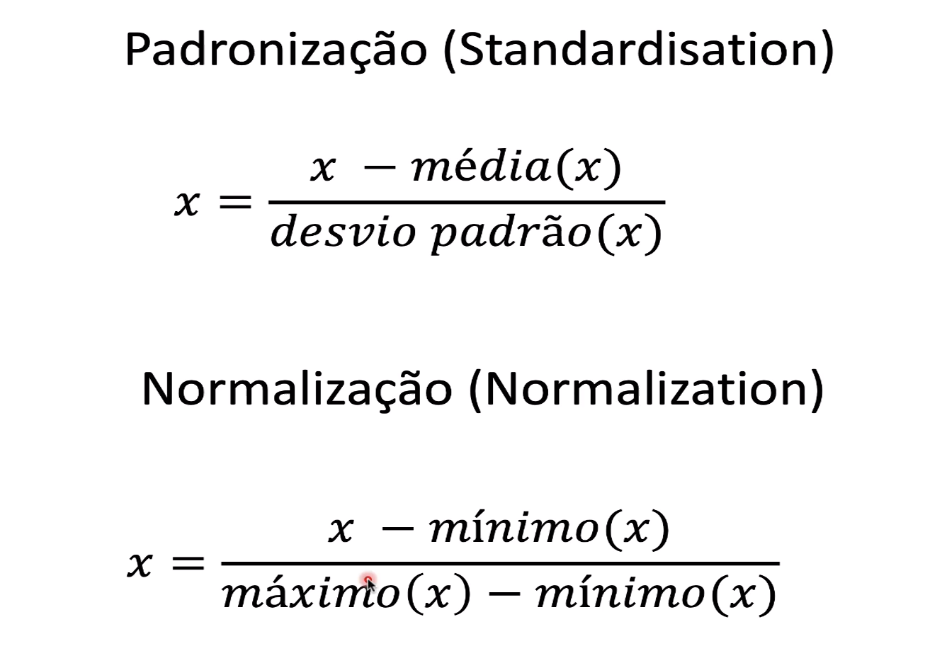

In [198]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)
# fit_transform - faz a variável X se encaixar nos e dados e realiza a transformação

Fit: O método ajusta o escalonador aos dados, calculando estatísticas relevantes (como média e desvio padrão para um scaler padrão) a partir do conjunto de treinamento.

Transform: Em seguida, ele aplica a transformação aos dados, usando as estatísticas calculadas durante a etapa de ajuste. Por exemplo, para um scaler padrão, isso pode envolver subtrair a média e dividir pelo desvio padrão.

In [199]:
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [200]:
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

# Divisão das bases em treinamento e teste

In [201]:
from sklearn.model_selection import train_test_split

In [211]:
X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = train_test_split(X_credit, y_credit, test_size=0.25, random_state=0)

In [212]:
X_credit_treinamento.shape

(1500, 3)

In [213]:
X_credit_teste.shape, y_credit_teste.shape

((1500,), (500,))

# Salvando as variáveis de treino e teste

In [214]:
import pickle
with open('credit.pkl', 'wb') as f:
  pickle.dump([X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste], f)

# Naïve Bayes

In [215]:
from sklearn.naive_bayes import GaussianNB

In [216]:
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [217]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [218]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [219]:
naive_credit_data = GaussianNB()

# treinando o algoritmo e criando a tabela de probabilidades
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento) # treinando com 1500 dados

GaussianNB()

In [221]:
previsoes = naive_credit_data.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [222]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [223]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [224]:
accuracy_score(previsoes, y_credit_teste)

0.938

In [226]:
confusion_matrix(previsoes, y_credit_teste)

array([[428,  23],
       [  8,  41]])

In [229]:
from yellowbrick.classifier import ConfusionMatrix

0.938

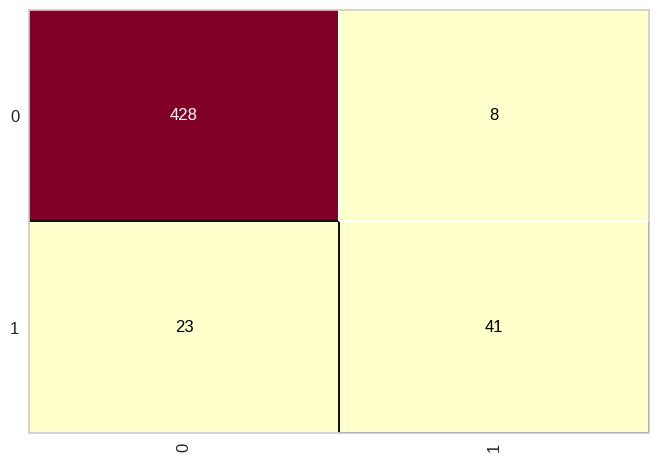

In [233]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

Apesar de ter uma acurácia bem alta, o algoritmo acerta bastante no quesito clientes que PAGAM empréstimos, representado pela variável 0. Podemos ver na matriz que o algoritmo acertou 428/500 relativas aos clientes pertencentes a 0. Todavia, na variável 1, representada pelos clientes que NÃO pagam empréstimos ele possui uma volatilidade muito alta durante a classificação, acertando 41 e classificando como clientes que PAGAM 23 pessoas.

**Precisão (Precision):**

Para a classe 0 (clientes que pagam empréstimos em dia), a precisão é 95%. Isso significa que, dos casos previstos como pagadores em dia, 95% eram realmente pagadores em dia.

Para a classe 1 (clientes que não pagam empréstimos em dia), a precisão é 84%. Isso indica que, dos casos previstos como não pagadores em dia, 84% eram realmente não pagadores em dia.

**Revocação (Recall):**

Para a classe 0, a revocação é 98%. Isso indica que, dos casos reais de pagadores em dia, o modelo conseguiu identificar corretamente 98% deles.
Para a classe 1, a revocação é 64%. Isso significa que o modelo identificou corretamente 64% dos casos reais de não pagadores em dia.

In [234]:
# percebemos que vendo a métrica "recall" que o algoritmo é extremamente eficaz na análise de clientes que pagam o empréstimo (0), tendo 98% de acurácia
# já na análise de clientes que NÃO pagam ele tem uma acurácia de apenas 64%

print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500

